# importing libraries  

In [1]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd 

# importing datasets

In [2]:
data_set= pd.read_csv('user_data.csv')
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Extracting Independent and dependent Variable

In [3]:
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values


# Splitting the dataset into training and test set.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

# "Support vector classifier

In [6]:
from sklearn.svm import SVC  
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

#Predicting the test set result

In [7]:
  y_pred= classifier.predict(x_test)

# Creating the Confusion matrix 

In [8]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred) 
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

# Visualization - Training Set

C:\Users\ashwa\AppData\Local\Temp\ipykernel_15904\4073933335.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


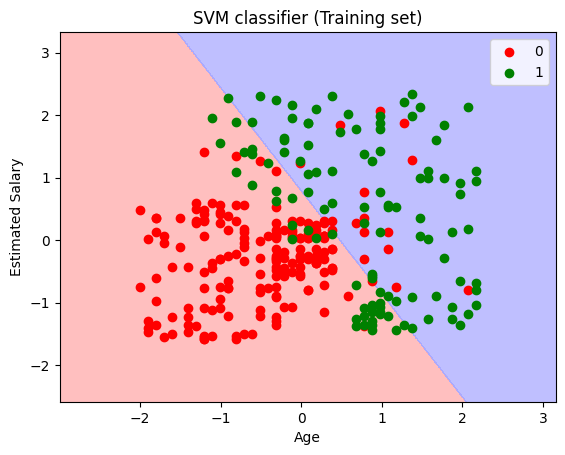

In [9]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     nm.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(['red', 'green'])(i), label=j)
mtp.title('SVM classifier (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

# Visualization - Test Set

C:\Users\ashwa\AppData\Local\Temp\ipykernel_15904\902933554.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


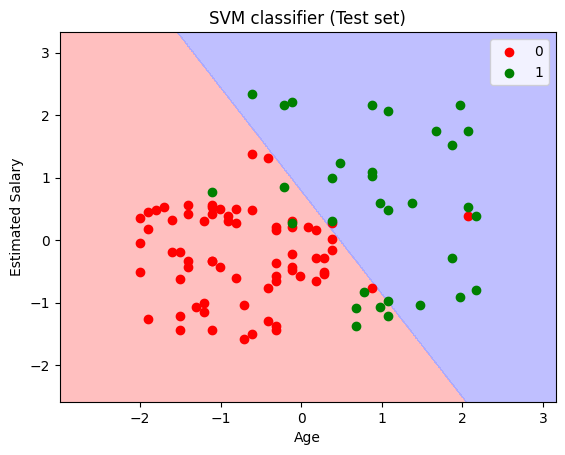

In [10]:
# Visulaizing the test set result  
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap((['#FFAAAA', '#AAAAFF'] )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap((['red', 'green']))(i), label = j)
mtp.title('SVM classifier (Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
